Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 04: Segmentation and Color

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 2, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [2 Bonus Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

YOUR ANSWER HERE

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

YOUR ANSWER HERE

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

## Assignment 1: Painting with a webcam using color detection [2 points]


### Introducing cvloop

From now on we will try to make the exercises a bit more interactive and enable you to see the algorithms in live action. For that purpose we use the package `cvloop`. To install it first source your cv environment and then run the follwing cell

In [1]:
!pip install cvloop

  Running setup.py bdist_wheel for cvloop: started
  Running setup.py bdist_wheel for cvloop: finished with status 'done'
  Stored in directory: C:\Users\DoktorManto\AppData\Local\pip\Cache\wheels\fb\c4\8f\ae75d16fe0fba0f875ae8f36927b377933e29f93765799795a
Successfully built cvloop


Check that it works by executing the cell below:

In [ ]:
from cvloop import cvloop
cvl = cvloop(function=lambda frame: 255 - frame, side_by_side=True)

### a)
In this task we will track a small colored object (like the cap of a pen) in front of a neutral background of a different color. We will use the location of the object to paint on a virtual canvas. For that you have to implement the following tasks in the `draw_func` function:

* Convert the image `img` given to the `draw_func` into HSV color space. You may use the OpenCV function `cvtColor`. Note: In OpenCV BGR and not RGB is the standard color space.
* Measure the color of your object. You may return the converted image and interactively measure the color with your mouse. Define your measured hue value in a constant
* Discard all channel except the hue channel. 
* Find the location with the most similar hue to the measured hue of your object. You may cast your `uint8` image to `int16`
to allow negative values
* Paint for example a circle at this position in `img_draw`.

Use OpenCV functions to find minima, draw circles, etc.

In [38]:
%matplotlib inline
from cvloop import cvloop
import cv2
import numpy as np

radius = 5
color = (255,255,255)
# Adapt this hue value to the hue of your object
h = 122

def draw_func(img):
    
    """
    Draw circle on img_draw at detected object location
    
    Args:
        img          the BGR input image (uint8)

    Returns:
        img_draw     img with circle drawn at postion of object
    """
    img_draw = np.zeros((480,640,3), np.uint8)

    result = img.copy()
    # Convert to HSL color space
    cv2.cvtColor(img,result,cv2.CV_BGR2HSV)
    # Discard all channels but hue
    hue,_,_ = cv2.split(result)
    # Get index of minimum value
    min_pos = np.argmin(np.absolute(hue - h),axis=0)
    # Draw circle on img_draw
    img_draw = cv2.circle(img_draw, min_pos, color, 3)
    
    return img_draw

In [ ]:
# Test with single image and without cvloop. (cvloop supresses errors in the called function)
%matplotlib inline
import imageio
import matplotlib.pyplot as plt

reader = imageio.get_reader('<video0>')
img = reader.get_next_data()

plt.imshow(draw_func(img))

reader.close()



In [ ]:
# Now use cvloop to run the algorithm live on webcam data     
cvl = cvloop(function=draw_func, side_by_side=True)

## Assignment 2: Histogram-based segmentation [5 Points]

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

Histogram-based segmentation uses an image's histogram to find minima and maxima by which to segment the image.

**Pro**

- effificent (only 1 pass over the image)

**Contra**

- difficult to identify significant peaks/valleys

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scikit-image and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

**Threshold Mean**

This procedure finds the mean of all grey values and chooses this as the threshold.

**Threshold Triangle**

The tirangle algorithm is a geometric method that assumes a peak at the extremes of the histogram. It constructs a line between the histogram peak and the farthest end of the histogram. Then, the threshold is the point of maximum distance between the line and the histogram.

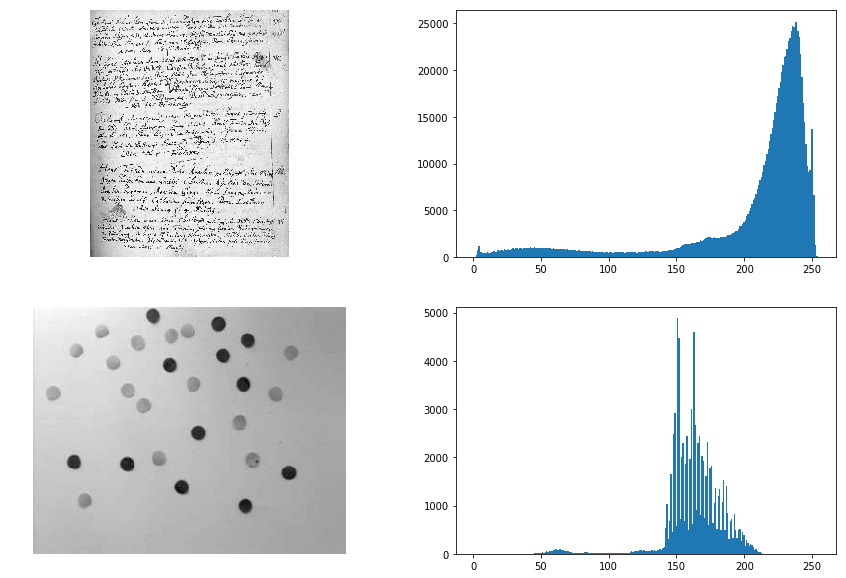

In [4]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt

# plt.imread reads pngs as float and jpg as uint8
img1 = plt.imread('images/schrift.png')*255
img2 = plt.imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

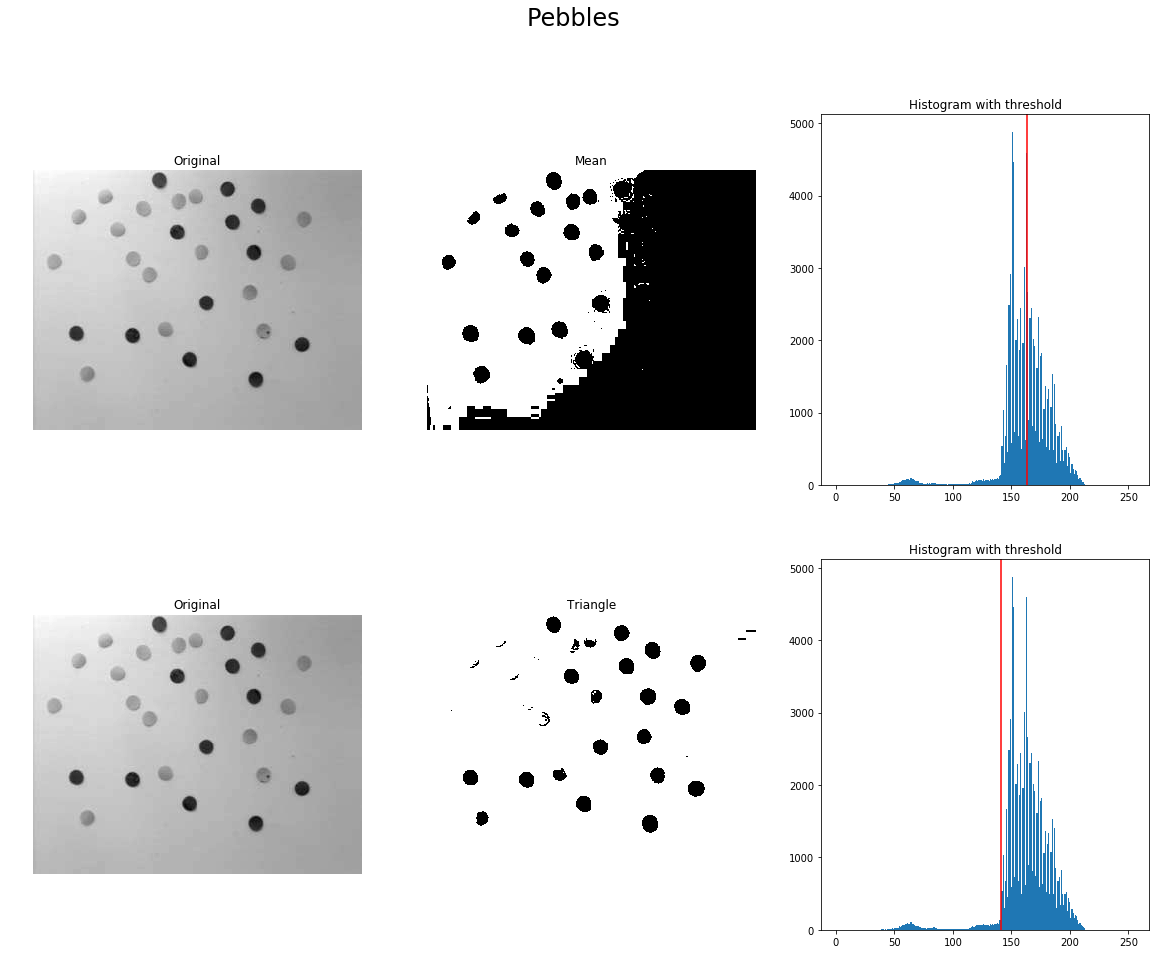

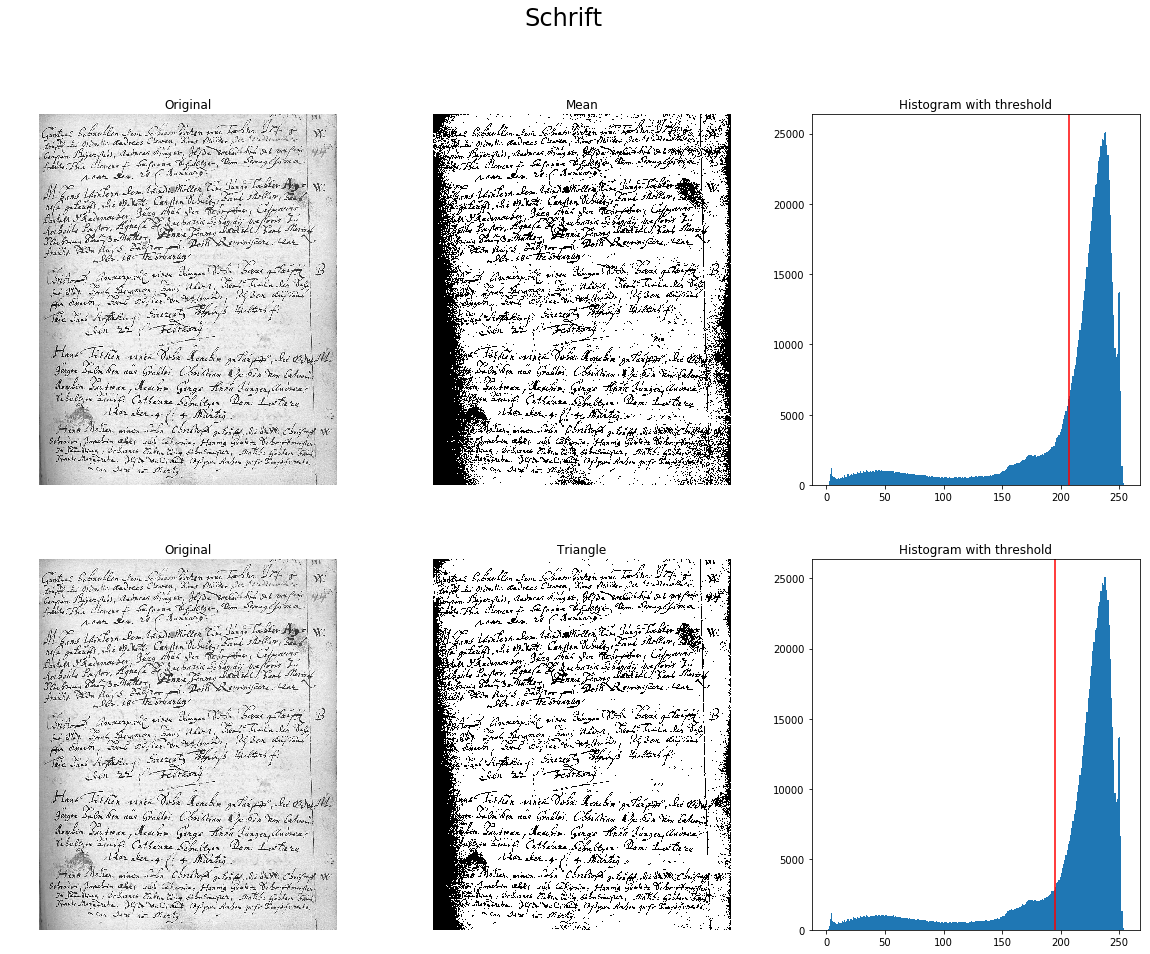

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_triangle, threshold_mean

def plot_threshold(img_title, img):
    mean = threshold_mean(img)
    triangle = threshold_triangle(img)

    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(img_title,fontsize=24)
    plt.gray()

    plt.subplot(2,3,1);
    plt.title('Original')
    plt.axis('off');
    plt.imshow(img)

    plt.subplot(2,3,2);
    plt.title('Mean')
    plt.axis('off');
    plt.imshow(np.where(img >= mean, 1, 0))

    plt.subplot(2,3,3);
    plt.title('Histogram with threshold')
    plt.hist(img.flatten(), 256, (0,255))
    plt.axvline(mean, color='r')

    plt.subplot(2,3,4);
    plt.title('Original')
    plt.axis('off');
    plt.imshow(img)

    plt.subplot(2,3,5);
    plt.axis('off');
    plt.title('Triangle')
    plt.imshow(np.where(img >= triangle, 1, 0))

    plt.subplot(2,3,6);
    plt.title('Histogram with threshold')
    plt.hist(img.flatten(), 256, (0,255))
    plt.axvline(triangle, color='r')
    plt.show()

plot_threshold('Pebbles', plt.imread('images/pebbles.jpg'))
plot_threshold('Schrift', (plt.imread('images/schrift.png') * 255).astype(np.uint8))

### c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`. You may use filter functions from scikit-image for this exercise.

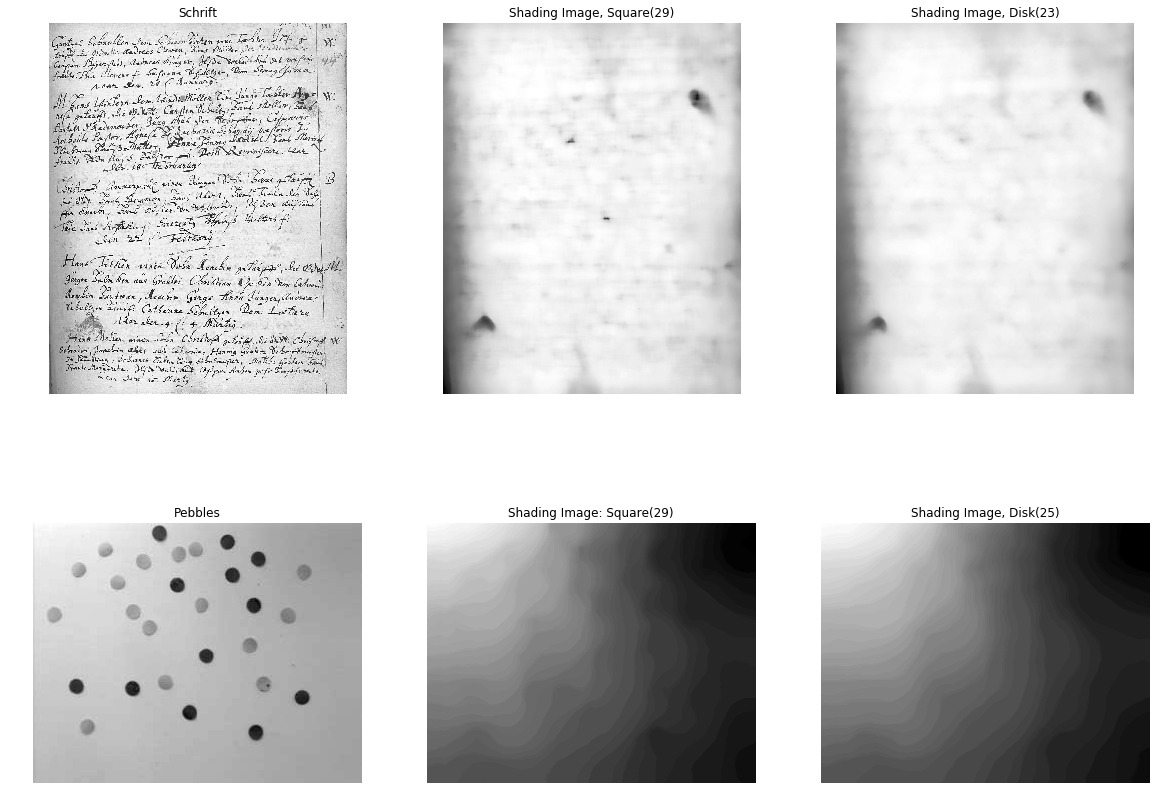

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters.rank import median, mean
from skimage.morphology import disk, square

img1 = plt.imread('images/schrift.png')
img2 = plt.imread('images/pebbles.jpg')

plt.figure(figsize=(20, 15))
plt.gray()

plt.subplot(2,3,1);
plt.title("Schrift")
plt.axis('off');
plt.imshow(img1)

plt.subplot(2,3,2);
plt.title("Shading Image, Square(29)")
plt.axis('off');
plt.imshow(median(img1, square(29)))

plt.subplot(2,3,3);
plt.title("Shading Image, Disk(23)")
plt.axis('off');
plt.imshow(median(img1, disk(23)))

plt.subplot(2,3,4);
plt.title("Pebbles")
plt.axis('off');
plt.imshow(img2)

plt.subplot(2,3,5);
plt.title("Shading Image: Square(29)")
plt.axis('off');
plt.imshow(median(img2.copy(), square(29)))

plt.subplot(2,3,6);
plt.title("Shading Image, Disk(25)")
plt.axis('off');
plt.imshow(median(img2.copy(), disk(25)))
plt.show()

## Assignment 3: Pyramid representation [3 Points]

**a)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

YOUR ANSWER HERE

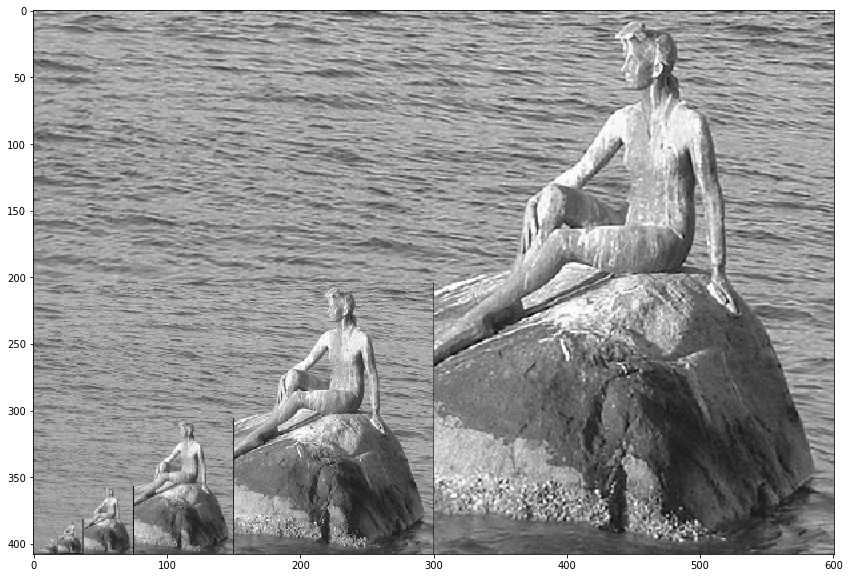

In [42]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.transform import downscale_local_mean

def overlay_pyramid(imgs):
    py_image = imgs[0]
    rows = py_image.shape[0]

    for p in imgs:
        n_rows, n_cols = p.shape
        py_image[(rows-n_rows):rows, 0:n_cols] = p
    
    return py_image

def reduce(img, n=3):
    """
    Calculates n reduction for an image.
    
    Parameters:
        img (ndarray) input image
        n (integer) number of levels to generate
        
    Returns:
        img (ndarray) array of all reduced images
    """
    result = [img]
    work = img
    
    for i in range(n):
        #work = gaussian(work,mode='mirror')
        result.append(downscale_local_mean(work, (2,2)))
        work = result[-1]
    
    return result

pyramid = reduce(img,5)


pyramid_image = overlay_pyramid(pyramid)

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**b)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

YOUR ANSWER HERE

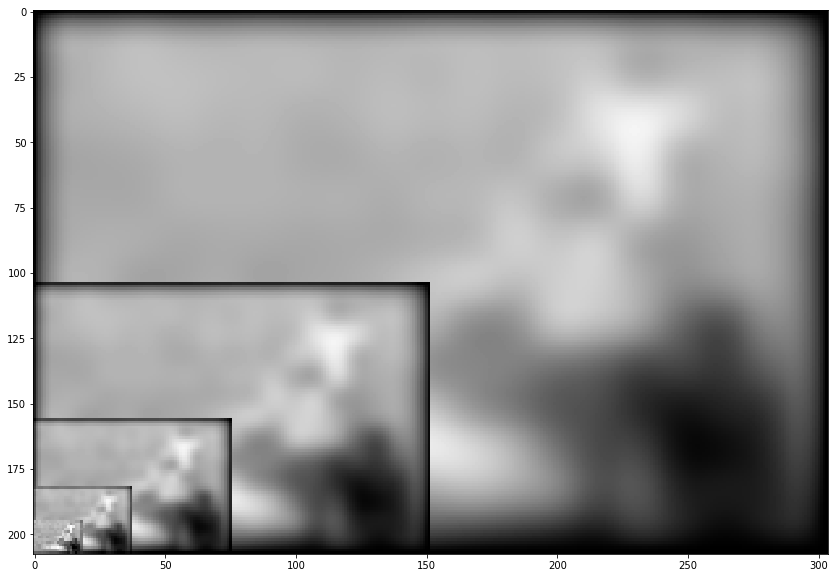

In [48]:
%matplotlib inline
import numpy as np
from scipy import ndimage
from skimage.transform import rescale
import matplotlib.pyplot as plt

img = plt.imread('images/mermaid.png')

def expand(image, steps=4):
    reduction = reduce(image,5)
    
    work = reduction[-1]
    result = [work]
    
    for i in range(steps):
        result.append(rescale(work, 2, multichannel=False, anti_aliasing=True))
        work = result[-1]
    
    return result

steps = 4
pyramid = expand(img,steps)
pyramid_image = overlay_pyramid(np.flip(pyramid))

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

## Assignment 4: Texture Segmentation [5 Points]

**a)** What is texture? Try to define it in your own words. Can there be a standard definition? What problems do you expect for texture based segmentation? 

1. Texture has no hard definition. Usually texture refers to a common pattern found in an image that reoccurs but is not strictly periodic. Texture can also be used to refer to the structure or *feeling* of a material (e.g. sand, cloth or stone).
2. Maybe there cannot be a standard definition, but one can look at different features textures imply (e.g. structure, frequency or stochastics).
3. Assigning a group to a region of inhomogenous of pixels is difficult.

**b)** What is a co-occurence matrix? How can it be used to characterize texture?

A co-occurence matrix is a two-dimensional histogram that specifies the correlation between pixels.


**c)** Implement a function to compute the co-occurence matrix of an image (patch). Apply it and compare your results to (CV-07 slide 54).

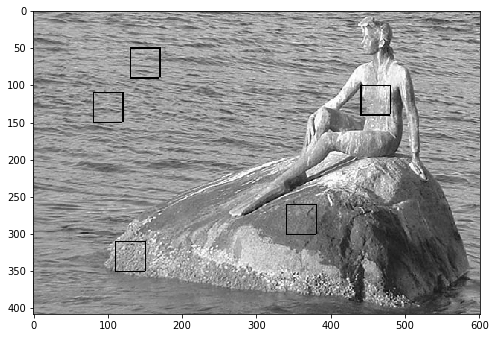

D:\06_Programme\Anaconda\envs\cv\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log
D:\06_Programme\Anaconda\envs\cv\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in greater


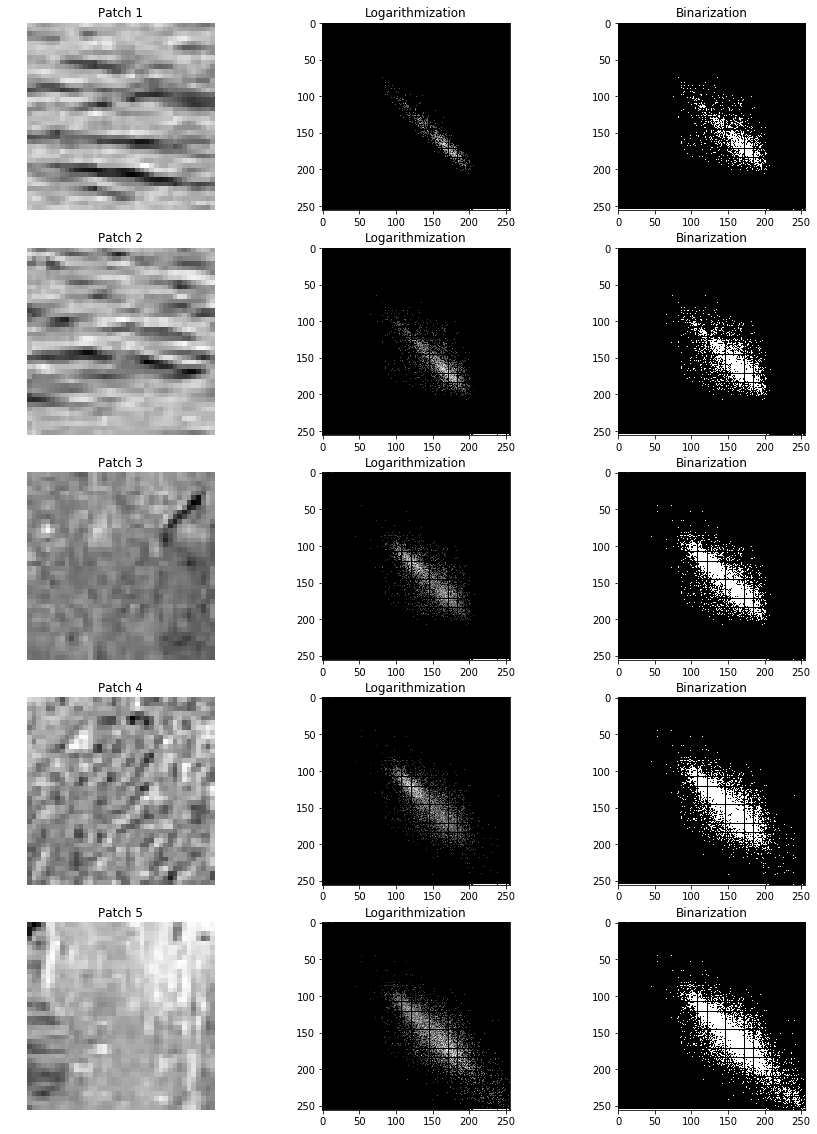

In [70]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio 

img = imageio.imread('images/mermaid.png')#, mode='L')

def get_patch(img, x, y, size=40):
    """
    Extract a rectangular patch from an image and mark it in the original image.
    """
    result = img[x:x+size,y:y+size].copy()
    img[x:x+size, [y,y+1,y+size,y+size+1]] = 0
    img[[x,x+1,x+size,x+size+1], y:y+size] = 0
    return result

patches = []
patches.append(get_patch(img, 50,130))
patches.append(get_patch(img, 110,80))
patches.append(get_patch(img, 260,340))
patches.append(get_patch(img, 310,110))
patches.append(get_patch(img, 100,440))


def cooccurrence(img, dx=1, dy=1):
    """
    Compute a co-occurence matrix for the given image.
    
    Args:
        img          the grayscale image (uint8)
        dx,dy        the offset between the two reference points

    Returns:
        matrix       the co-occurence matrix
    """
    matrix = np.empty((256, 256))
    
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            matrix[img[i,j],img[i+dx,j+dy]] += 1
            
    return matrix


plt.figure(figsize=(8, 8))
plt.gray()
plt.imshow(img)
plt.show()


plt.figure(figsize=(15, 20))
i = 0
for p in patches:
    plt.subplot(len(patches),3,i+1); plt.title('Patch {}'.format(int(i/3+1)))
    plt.axis('off'); plt.imshow(p)
    # For visualization one may apply some extra me, e.g., logarithmization or binarization
    plt.subplot(len(patches),3,i+2); plt.title('Logarithmization')
    plt.imshow(np.log(1 + cooccurrence(p,0,1)), interpolation='none')
    plt.subplot(len(patches),3,i+3); plt.title('Binarization')
    plt.imshow(cooccurrence(p,1,0)>0, interpolation='none')
    i += 3
plt.show()

## Assignment 5: Region merging [5 Points]

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

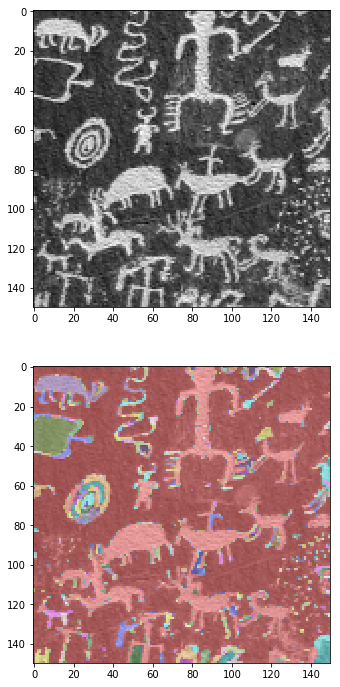

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
import imageio
import warnings
warnings.filterwarnings('ignore')

sizex = 150
sizey = 150
img = imageio.imread('images/segments.png', pilmode='L')[0:sizex, 0:sizey]

threshold = 35

# compute the `label` array by implementing "region merging"

# Generate intial labels
#labels1 = np.arange(img.shape[0]*img.shape[1]).reshape((img.shape[0],img.shape[1]))
labels1 = segmentation.slic(img, n_segments=img.shape[0]*img.shape[1])

# Generate regions adjacency graph
rag = graph.rag_mean_color(img, labels1, mode='distance', connectivity=1)

# Combine regions connected by edges with a weight <= threshold
labels2 = graph.cut_threshold(labels1, rag, threshold)

# Make a nice color image from the labels
label = color.label2rgb(labels2, img, kind='overlay')

plt.figure(figsize=(12, 12))
plt.gray()
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(label, cmap='prism')
plt.show()


warnings.filterwarnings('ignore')